In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Jupyterでの画像表示用

from IPython.display import display, Image


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。"""
    ret, encoded = cv2.imencode(".bpm", img)
    display(Image(encoded, width=600))

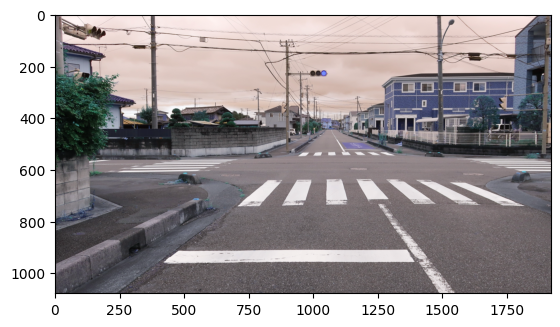

In [28]:
# 画像の読み込み
image = cv2.imread(r"C:\Git\MyYolo\materials\g9pc7kz6.bmp", cv2.IMREAD_COLOR)

imshow(image)


In [ ]:
temo_image = image

# グレースケールに変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cannyエッジ検出
edges = cv2.Canny(gray, 100, 150)

# Hough変換で直線を検出
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# 検出した直線を画像に描画
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 画像を表示
cv2.imshow("Detected Stop Lines", image)
cv2.waitKey(0)
cv2.destroyAllWindows()